## NLP Assignment 2
## Shivji_Bhagat_16110149

In [3]:
#Question 2
%matplotlib inline
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import math
####################################################################################################

file=open('Alice','r')                                #fille object in read mode
f_string=file.read()                                            #returns the sile in string format
f_string=f_string.replace('\n',' ')                             #replacing all \n with '  '
sentance_list=sent_tokenize(f_string)

#dividing the sentances into 80-20 ratio
s_80=[]
s_20=[]
l=len(sentance_list)
pos=int(0.8*l)
s_80=sentance_list[:l]
s_20=sentance_list[l:]


In [4]:
#Question 3
word_list=word_tokenize(f_string)
unigram={}
bigram={}
trigram={}
quadgram={}

unigram_count={}
unique_unigram=list(set(word_list))
token=len(word_list)
Type=len(unique_unigram)
for i in unique_unigram:
    tmp=word_list.count(i)
    unigram_count[i]=tmp
    unigram[i]=tmp/token
#print(unigram)
    
    
    
#bigrams
bigram_list=list(nltk.bigrams(word_list))
unique_bigram=list(set(bigram_list))
bigram_count={}
for i in unique_bigram:
    tmp=bigram_list.count(i)
    bigram_count[i]=tmp
    try:
        bigram[i]=tmp/unigram_count[i[0]]
    except:
        bigram[i]=0
#print bigram

        
        
#trigrams
trigram_list=list(ngrams(word_list,3))
unique_trigram=list(set(trigram_list))
trigram_count={}
for i in unique_trigram:
    tmp=trigram_list.count(i)
    trigram_count[i]=tmp
    try:
        trigram[i]=tmp/bigram_count[(i[0],i[1])]
    except:
        trigram[i]=0
#print(trigram)
        
        
#quadgrams
quadgram_list=list(ngrams(word_list,4))
unique_quadgram=list(set(quadgram_list))
quadgram_count={}
for i in unique_quadgram:
    tmp=quadgram_list.count(i)
    quadgram_count[i]=tmp
    try:
        quadgram[i]=tmp/trigram_count[(i[0],i[1],i[2])]
    except:
        quadgram[i]=0
#print(quadgram)

In [5]:
#question 4

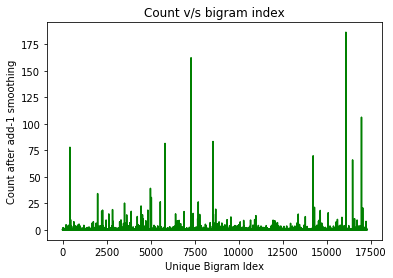

In [6]:
#question 5
#add 1 smoothing for bigrams
l=len(unique_unigram)
add1_bigram={}
add1_count={}
for i in unique_bigram:
    add1_bigram[i]=(bigram_count[i]+1)/(l+unigram_count[i[0]])
    add1_count[i]=add1_bigram[i]*unigram_count[i[0]]

x=list(range(0,len(unique_bigram)))
y=list(add1_count.values())
y1=list(bigram_count.values())                                 #Plotting count after add-1 smoothing
plt.plot(x,y,'g')
plt.xlabel("Unique Bigram Idex")
plt.ylabel("Count after add-1 smoothing")
plt.title("Count v/s bigram index")
plt.show()


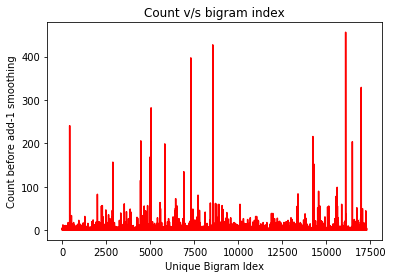

In [7]:
x=list(range(0,len(unique_bigram)))
y1=list(bigram_count.values())                                        #Plotting count before add-1 smoothing
plt.plot(x,y1,'r')
plt.xlabel("Unique Bigram Idex")
plt.ylabel("Count before add-1 smoothing")
plt.title("Count v/s bigram index")
plt.show()


It is clearly visible that the count for bigrams with index near 5000, 5250 etc. the count falls drastically after add-1 smoothing. The corresponding bigrams and their respective counts are printed below.

In [8]:
print(unique_bigram[5250],' :',add1_bigram[unique_bigram[5250]], '(After smoothing)')
print(unique_bigram[5250],' :',bigram_count[unique_bigram[5250]],'(Before smoothing)')
print(unique_bigram[4999],' :',add1_bigram[unique_bigram[4999]], '(After smoothing)')
print(unique_bigram[4999],' :',bigram_count[unique_bigram[4999]],'(Before smoothing)')


('“', 'Be')  : 0.0005272871078302136 (After smoothing)
('“', 'Be')  : 1 (Before smoothing)
('court', ';')  : 0.0005350454788657035 (After smoothing)
('court', ';')  : 1 (Before smoothing)


In [9]:
#Question 6


In [11]:
#Question 7

#perplexity value for bigram model using add-1 smoothing
test=[]
for i in s_20: 
    test+=i.split()

perplx=1
bigram_list1=list(nltk.bigrams(s_20))
unique_bigram1=list(set(bigram_list1))

for i in unique_bigram1:
    perplx=perplx*(1/add1_bigram[i])

#perplx=perplx**(1/len(unique_bigram1))
